# The classification goal is to predict if the client will subscribe to a term deposit (variable y).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###  Input variables:
#### 1. ID - Client ID
#### 2. Age
#### 3. Job: Type of job
#### 4. Marital: marital status
#### 5. Education (categorical: "primary","secondary", "tertiary", "unknown")
#### 6. Default - has credit in default? (Categorial: "yes","no")
#### 7. Balance - numeric
#### 8. Housing - has housing loan? (Categorial: "yes","no")
#### 9. Loan - has personal loan? (Categorial: "yes","no")
#### 10. Contact - contact communication type (Categorical: "cellular", "telephone")
#### 11. Month: last contact month of year (Categorial: "jan","feb",...,"dec")
#### 12. Day: last contact da of the week (Categorial: "mon", "tue", "wed", "thurs", "fri")
#### 13. Duration:  Last contact duration, in seconds (numerica) -> This attribute highly affects the output target if duration = 0, then output = "no". Should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
#### 14. Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#### 15. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
#### 16. previous: number of contacts performed before this campaign and for this client (numeric)
#### 17. poutcome: outcome of the previous marketing campaign (categorical: "failure", "unknown", "other", "success")

### Output variable (desired target):
#### 18. y - has the client subsribed a term deposit? (binary: "yes", "no")

In [13]:
train = pd.read_csv(r"D:\Content\deep_learning\october\lesson_1\new_data_1\train.csv\train.csv")
test = pd.read_csv(r"D:\Content\deep_learning\october\lesson_1\new_data_1\test.csv\test.csv")

In [14]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [15]:
train.shape

(31647, 18)

In [16]:
test.shape

(13564, 17)

In [17]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


## Filling NaN(unknown values) 

In [19]:
train_columns = train.columns
print(train_columns)

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


In [23]:
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [24]:
def visualise(table,columns):
    for col in columns:
        if table[col].dtype == 'int64':
            plt.hist(table[col].value_counts(), Label= True)
            plt.title('Histogram for {}'.format(col))
            plt.show()
            
        else:
            plt.pie(table[col].value_counts(), labels=table[col].unique())
            plt.title('Piechart for {}'.format(col))
            plt.show()

<ipython-input-24-f3ef5f611b89>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.hist(table[col].value_counts(), Label= True)


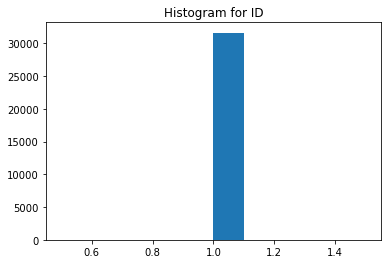

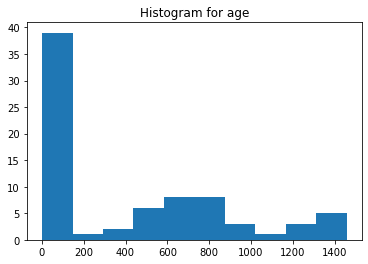

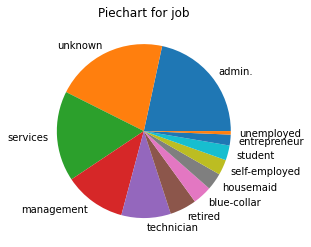

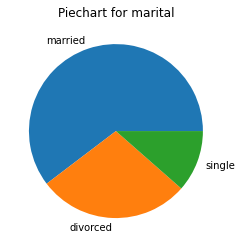

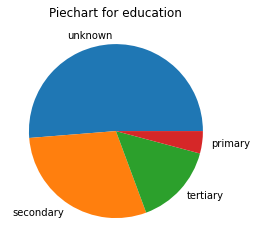

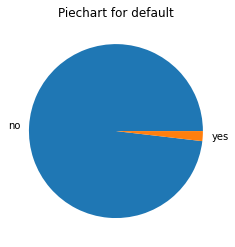

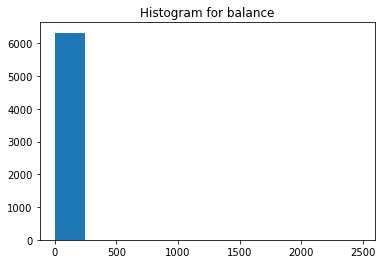

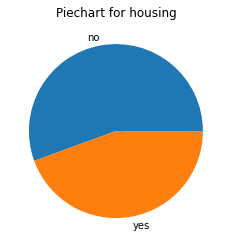

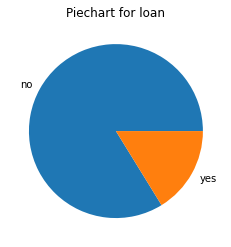

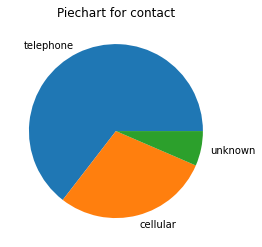

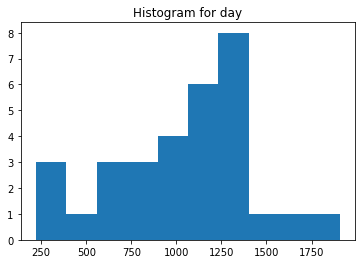

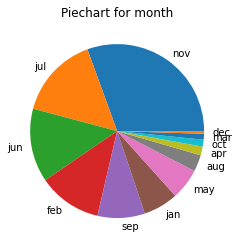

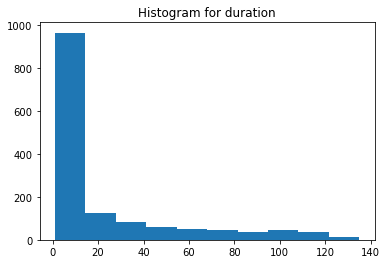

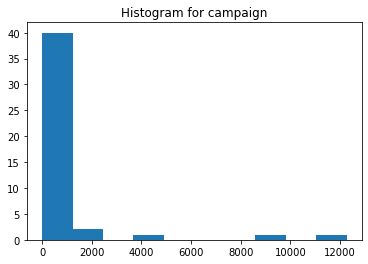

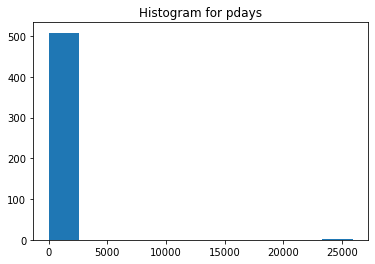

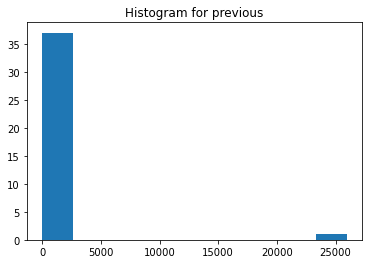

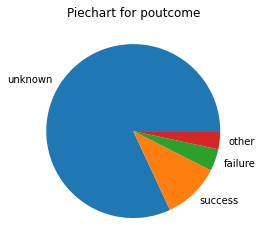

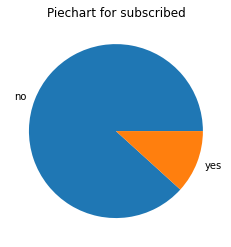

In [25]:
visualise(train, train_columns)

In [ ]:
#we could either create dummies which would look like this:

In [26]:
train_new_dftr = pd.get_dummies(train, prefix=None, prefix_sep='_',drop_first=True)

In [28]:
train_new_dftr.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,subscribed_yes
0,26110,56,1933,19,44,2,-1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,1,0,1
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
train_new_dftr.columns

Index(['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'subscribed_yes'],
      dtype='object')

In [30]:
train.corr()

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


In [31]:
train.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647,31647,31647,31647,31647.000000,31647,31647,31647,31647.000000,31647,31647.000000,31647.000000,31647.000000,31647.000000,31647,31647
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,6842,19095,16224,31062,NaN,17584,26516,20423,NaN,9669,NaN,NaN,NaN,NaN,25929,27932
mean,22563.972162,40.957247,NaN,NaN,NaN,NaN,1363.890258,NaN,NaN,NaN,15.835466,NaN,258.113534,2.765697,39.576042,0.574272,NaN,NaN
std,13075.936990,10.625134,NaN,NaN,NaN,NaN,3028.304293,NaN,NaN,NaN,8.337097,NaN,257.118973,3.113830,99.317592,2.422529,NaN,NaN
min,2.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,11218.000000,33.000000,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,8.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,22519.000000,39.000000,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,33879.500000,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,318.500000,3.000000,-1.000000,0.000000,NaN,NaN


In [32]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [33]:
import seaborn as sns

ValueError: Could not interpret input 'y'

In [37]:
train["job"].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [38]:
train["education"].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64